# Tutorial: Product Operator Basis (Zeeman and PMZ) in Liouvillie Space
## PyOR Version: Jeener (release date not decided)

Author: Vineeth Thalakottoor \
Email: vineethfrancis.physics@gmail.com

## Import necessery packages and define source code of PyOR

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source')

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Generating Spin System

In [2]:
Slist1 = [1/2,1/2]
hbarEQ1 = True    

System = PyOR.Numerical_MR(Slist1,hbarEQ1)
Sx,Sy,Sz = System.SpinOperator()
Sp,Sm = System.PMoperators(Sx,Sy)

## Generating Product Operator Basis: PMZ Basis (Hilbert Space)

In [3]:
# Product Operators Basis
sort = 'negative to positive'
Index = False
Normal = True
Basis_PMZ, coh_PMZ, dic_PMZ = System.ProductOperators_SpinHalf_PMZ(sort,Index,Normal)
OpB_H = System.String_to_Matrix(dic_PMZ, Basis_PMZ)

['Im1Im2', 'Im2', 'Im1', 'Im1Iz2', 'Iz1Im2', '', 'Iz2', 'Im1Ip2', 'Iz1', 'Iz1Iz2', 'Ip1Im2', 'Ip2', 'Iz1Ip2', 'Ip1', 'Ip1Iz2', 'Ip1Ip2']


In [4]:
Matrix(OpB_H["Im1Im2"])

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

## Generating Zeeman Hamiltonian (Lab and Rotating Frame)

In [5]:
# Gyromagnetic Ratio
Gamma = [System.gammaH1,System.gammaH1]
    
# B0 Field in Tesla, Static Magnetic field (B0) along Z
B0 = 1.0 

# Offset Frequency in Hz
Offset = [10.0,20.0]
    
# generate Larmor Frequencies
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

# Rotating Frame Frequency
OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0]
    
# Lab Frame Hamiltonian
Hz_lab = System.Zeeman(LarmorF,Sz)

# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

Larmor Frequency in MHz:  [-42.57745869 -42.57746869]


## Hamiltonian in Hilbert Space

In [6]:
Matrix(Hz/(2.0*np.pi))

Matrix([
[-15.0000000000126,                0,                 0,                0],
[                0, 5.00000000158526,                 0,                0],
[                0,                0, -5.00000000158526,                0],
[                0,                0,                 0, 15.0000000000126]])

## Zeeman Basis State

In [7]:
Basis_Zeeman_state = System.ZBasis_H(Hz_lab)

In [8]:
Basis_Zeeman_state

[array([[1.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [1.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [1.]])]

## Singlet Triplet Basis State

In [9]:
Basis_ST_state = System.STBasis(Hz_lab)

<IPython.core.display.Latex object>

In [10]:
Basis_ST_state

[array([[1.],
        [0.],
        [0.],
        [0.]]),
 array([[0.        ],
        [0.70710678],
        [0.70710678],
        [0.        ]]),
 array([[0.],
        [0.],
        [0.],
        [1.]]),
 array([[ 0.        ],
        [ 0.70710678],
        [-0.70710678],
        [ 0.        ]])]

## Transformation Between Zeeman state and Singlelet state

In [11]:
U_Z_ST = System.Transform_StateBasis(Basis_Zeeman_state,Basis_ST_state)
Matrix(U_Z_ST)

Matrix([
[1.0,                 0,   0,                  0],
[  0, 0.707106781186547,   0,  0.707106781186547],
[  0, 0.707106781186547,   0, -0.707106781186547],
[  0,                 0, 1.0,                  0]])

In [12]:
Matrix(System.State_BasisChange(Basis_Zeeman_state[3],U_Z_ST))

Matrix([
[                 0],
[ 0.707106781186547],
[-0.707106781186547],
[                 0]])

## J Coupling Hamiltonian

In [13]:
Jlist = np.zeros((len(Slist1),len(Slist1)))
Jlist[0][1] = 1
Hj = System.Jcoupling(Jlist,Sx,Sy,Sz)
Matrix(Hj)

Matrix([
[1.5707963267949,                0,                0,               0],
[              0, -1.5707963267949, 3.14159265358979,               0],
[              0, 3.14159265358979, -1.5707963267949,               0],
[              0,                0,                0, 1.5707963267949]])

## Transformation of J Coupling Hamiltonian from Zeeman to Singlet Triplet

In [14]:
Hj_ST = System.Operator_BasisChange(Hj,U_Z_ST)
Matrix(System.Matrix_Round(System.Matrix_Tol(Hj_ST/(2.0*np.pi),1.0e-5),2))

Matrix([
[0.25,    0,    0,     0],
[   0, 0.25,    0,     0],
[   0,    0, 0.25,     0],
[   0,    0,    0, -0.75]])

## Basis Kets

In [15]:
Kets = System.Basis_Ket()
Kets

['|1/2,1/2>|1/2,1/2>',
 '|1/2,1/2>|1/2,-1/2>',
 '|1/2,-1/2>|1/2,1/2>',
 '|1/2,-1/2>|1/2,-1/2>']

## Basis Bras

In [16]:
Bras = System.Basis_Bra()
Bras

['<1/2,1/2|<1/2,1/2|',
 '<1/2,1/2|<1/2,-1/2|',
 '<1/2,-1/2|<1/2,1/2|',
 '<1/2,-1/2|<1/2,-1/2|']

## Product Operator Basis: Zeeman (Hilbert Space)

In [17]:
Basis_Zeeman, dic_Zeeman = System.ProductOperators_Zeeman(Hz_lab)

In [18]:
Matrix(Basis_Zeeman[0])

Matrix([
[1.0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0]])

In [19]:
# Dictionary
dic_Zeeman

['|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|']

## Hamiltonian in Liouvillie Space (Zeeman basis)

In [20]:
Hz_L = System.CommutationSuperoperator(Hz)
Matrix(System.Matrix_Round(Hz_L/(2.0*np.pi),2))

Matrix([
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0, -20.0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0, -10.0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0, -30.0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0, 20.0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0, 10.0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0, -10.0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0, 10.0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0, -10.0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,  

## Product Operator Basis: Zeeman Liouvillie

In [21]:
Basis_Zeeman_L = System.ProductOperators_ConvertToLiouville(Basis_Zeeman)

In [22]:
Matrix(Basis_Zeeman_L[0])

Matrix([
[1.0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0]])

## Product Operator Basis: PMZ Liouvillie

In [23]:
Basis_PMZ_L = System.ProductOperators_ConvertToLiouville(Basis_PMZ)

In [24]:
Matrix(Basis_PMZ_L[0])

Matrix([
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[1.0],
[  0],
[  0],
[  0]])

## Eigen Frequencies: Hilbert

In [25]:
System.EigFreq_ProductOperator_H(Hz,OpB_H["Im1Im2"])

30.000000000025157

## Eigen Frequencies: Liouvillie

In [26]:
for i in range(System.Ldim):
    print("Eigen frequency of " + dic_PMZ[i] + "(" + str(coh_PMZ[i]) + ") :", System.EigFreq_ProductOperator_L(Hz_L,Basis_PMZ_L[i]))

Eigen frequency of Im1 Im2 (-2) : 30.000000000025157
Eigen frequency of Id1 Im2 (-1) : 20.00000000159783
Eigen frequency of Im1 Id2 (-1) : 9.999999998427322
Eigen frequency of Im1 Iz2 (-1) : 9.999999656141906
Eigen frequency of Iz1 Im2 (-1) : 19.999999317026997
Eigen frequency of Id1 Id2 (0) : 0.0
Eigen frequency of Id1 Iz2 (0) : 0.0
Eigen frequency of Im1 Ip2 (0) : -10.000000003170511
Eigen frequency of Iz1 Id2 (0) : 0.0
Eigen frequency of Iz1 Iz2 (0) : 0.0
Eigen frequency of Ip1 Im2 (0) : 10.000000003170511
Eigen frequency of Id1 Ip2 (1) : -20.00000000159783
Eigen frequency of Iz1 Ip2 (1) : -19.999999317026997
Eigen frequency of Ip1 Id2 (1) : -9.999999998427322
Eigen frequency of Ip1 Iz2 (1) : -9.999999656141906
Eigen frequency of Ip1 Ip2 (2) : -30.000000000025157


## Basis Transformation Matrix: From Zeeman to PMZ Basis (Liouvillie Space) 

In [27]:
U_Z_PMZ = System.Transform_StateBasis(Basis_Zeeman_L,Basis_PMZ_L)

In [28]:
Matrix(U_Z_PMZ)

Matrix([
[  0,                 0,                 0,                 0,                 0, 0.5,  0.5,    0,  0.5,  0.5,    0,                  0,                 0,                  0,                 0,   0],
[  0,                 0,                 0,                 0,                 0,   0,    0,    0,    0,    0,    0, -0.707106781186547, -0.70710676908493,                  0,                 0,   0],
[  0,                 0,                 0,                 0,                 0,   0,    0,    0,    0,    0,    0,                  0,                 0, -0.707106781186547, -0.70710676908493,   0],
[  0,                 0,                 0,                 0,                 0,   0,    0,    0,    0,    0,    0,                  0,                 0,                  0,                 0, 1.0],
[  0, 0.707106781186547,                 0,                 0,  0.70710676908493,   0,    0,    0,    0,    0,    0,                  0,                 0,                  0,            

In [29]:
Matrix(System.State_BasisChange(Basis_Zeeman_L[0],U_Z_PMZ))

Matrix([
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[1.0],
[  0],
[  0],
[  0]])

## Liouvillie Bracket

In [30]:
System.Liouville_Bracket(Basis_Zeeman_L[0],Hz_L/(2.0*np.pi),Basis_Zeeman_L[0])

0.0

In [31]:
System.Liouville_Bracket(Basis_PMZ_L[0],Hz_L/(2.0*np.pi),Basis_PMZ_L[0])

30.000000000025157

## Hamiltonian in Liouvillie Space (PMZ basis)

In [32]:
Hz_L_PMZ = System.Operator_BasisChange(Hz_L,U_Z_PMZ)

In [33]:
Matrix(System.Matrix_Round(System.Matrix_Tol(Hz_L_PMZ/(2.0*np.pi),1.0e-5),2))

Matrix([
[30.0,    0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0, 20.0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0, 10.0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0, 10.0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0, 20.0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0, -10.0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0,     0, 0, 0,    0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, 0, 0,     0, 0, 0, 10.0,     0,     0,  

## Dipolar Homonuclear Relaxation 

In [34]:
R = None 
Rprocess = "Auto-correlated Dipolar Homonuclear"
tau = 10.0e-12
bIS = [20.0e3]
System.Relaxation_Parameters(LarmorF, OmegaRF, tau, bIS)
R_L = System.Relaxation_L(Rprocess,R,Sx,Sy,Sz,Sp,Sm)

<IPython.core.display.Javascript object>


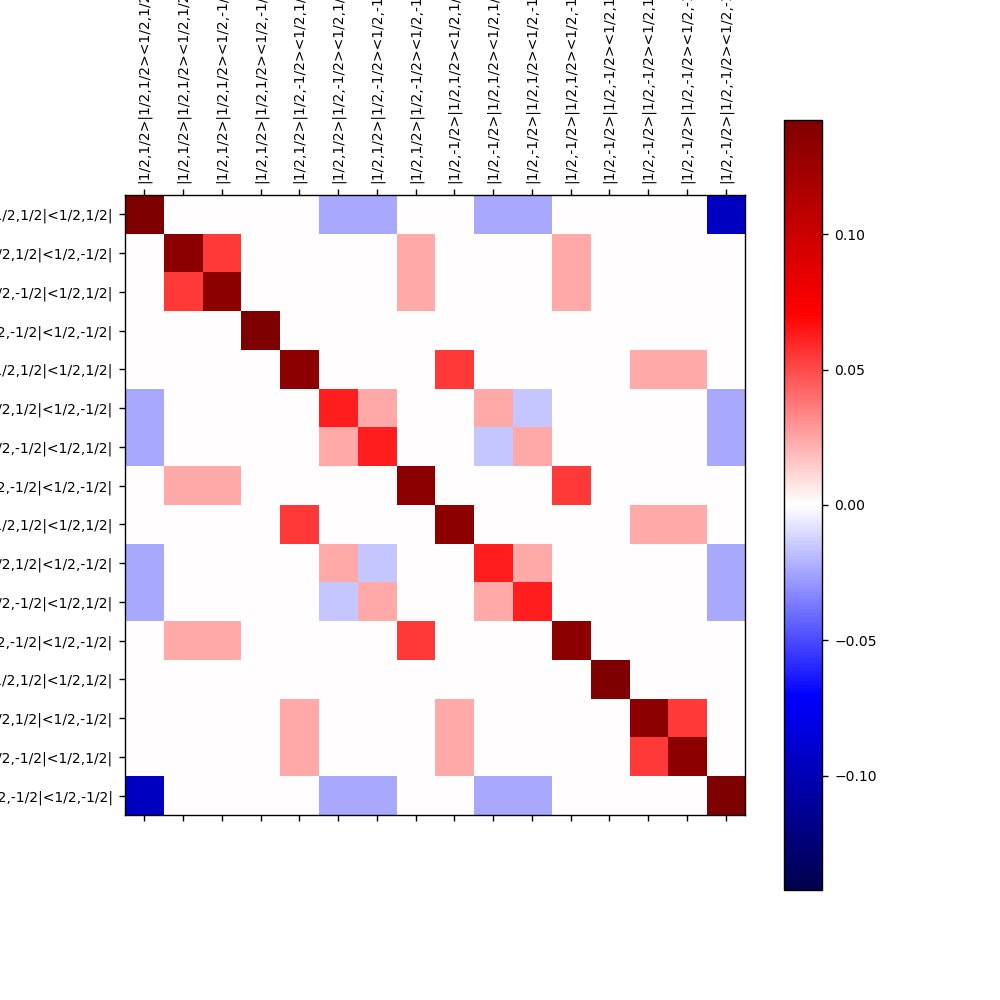

In [35]:
System.MatrixPlot(1,R_L.real,dic_Zeeman,dic_Zeeman)

<IPython.core.display.Javascript object>


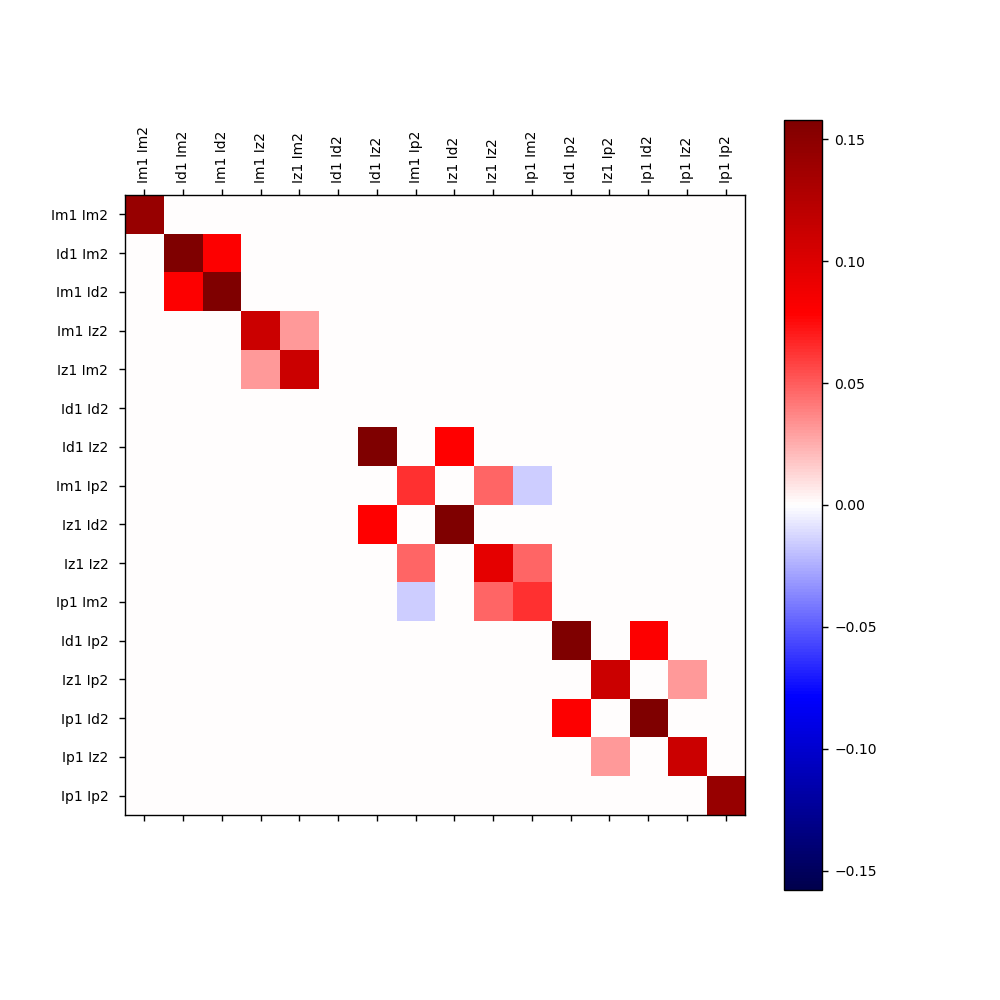

In [36]:
System.MatrixPlot(2,System.Operator_BasisChange(R_L.real,U_Z_PMZ).real,dic_PMZ,dic_PMZ)

## Any suggestion? write to me
vineethfrancis.physics@gmail.com